In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import os
import warnings

In [2]:
sns.set_style()

In [3]:
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [4]:
base = os.path.dirname(os.getcwd())
judges_path = os.path.join(base, 'csv files', 'Judge_Comp_Nat.csv')
comp_path = os.path.join(base, 'csv files', 'Competition_Results.csv')

In [5]:
judges_df = pd.read_csv(judges_path)
comp_df = pd.read_csv(comp_path)

In [6]:
comp_df

,rank,name,nation,startnr,total,tech,pcs,deductions,competition,element,...,Judge No.1,Judge No.2,Judge No.3,Judge No.4,Judge No.5,Judge No.6,Judge No.7,Judge No.8,Judge No.9,final_element_score
0,1,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,ec2020SEG001OF,4S+2T,...,1.0,3.0,3.0,2.0,3.0,1.0,2.0,2.0,3.0,13.22
1,1,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,ec2020SEG001OF,3F,...,2.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,4.0,6.66
2,1,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,ec2020SEG001OF,FSSp4,...,3.0,2.0,3.0,3.0,4.0,3.0,3.0,2.0,3.0,3.86
3,1,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,ec2020SEG001OF,3A,...,3.0,2.0,3.0,4.0,3.0,2.0,2.0,3.0,4.0,11.09
4,1,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,ec2020SEG001OF,StSq4,...,2.0,5.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,5.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23478,24,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,wc2025SEG004OF,2A+2T,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.11
23479,24,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,wc2025SEG004OF,3Sq+2T,...,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,4.01
23480,24,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,wc2025SEG004OF,LSp2,...,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,-1.0,2.06
23481,24,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,wc2025SEG004OF,StSq3,...,1.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,-2.0,3.30


### Adding contry codes

In [34]:
judge_map = {}

for _, row in judges_df.iterrows():
    key = (row['competition'], row['role'])
    judge_map[key] = (row['country'], row['judge'])

#judge_map

In [8]:
for i in range(1,10):
    judge_nr = f'Judge No.{i}'
    judge_nation = f'{judge_nr} nation'

    comp_df[judge_nation] = comp_df.apply(
        lambda row: judge_map.get((row['competition'], judge_nr))[0],
        axis=1
    )

In [9]:
'''at this point it was discovered that judges nationalities were whole names,
 whereas the skater's ones were the country codes'''

countries = pd.unique(comp_df[['Judge No.1 nation', 
                   'Judge No.2 nation', 
                   'Judge No.3 nation', 
                   'Judge No.4 nation', 
                   'Judge No.5 nation',
                   'Judge No.6 nation',
                   'Judge No.7 nation',
                   'Judge No.8 nation',
                   'Judge No.9 nation']].values.ravel())

# for country in countries:
#     print(f'"{country}"')


In [10]:
np.sort(pd.unique(comp_df['nation']))

array(['ARM', 'AUS', 'AUT', 'AZE', 'BEL', 'BLR', 'BUL', 'CAN', 'CHN',
       'CRO', 'CYP', 'CZE', 'DEN', 'ESP', 'EST', 'FIN', 'FRA', 'FSR',
       'GBR', 'GEO', 'GER', 'GRE', 'HKG', 'HUN', 'IND', 'IRL', 'ISL',
       'ISR', 'ITA', 'JPN', 'KAZ', 'KOR', 'LAT', 'LTU', 'MAS', 'MDA',
       'MEX', 'MON', 'NED', 'NOR', 'NZL', 'PHI', 'POL', 'ROU', 'RSA',
       'RUS', 'SGP', 'SLO', 'SRB', 'SUI', 'SVK', 'SWE', 'TPE', 'TUR',
       'UKR', 'USA'], dtype=object)

In [11]:
country_codes = {
    "Georgia": "GEO",
    "Turkey": "TUR",
    "Norway": "NOR",
    "Latvia": "LAT",
    "Ukraine": "UKR",
    "Slovakia": "SVK",
    "Spain": "ESP",
    "France": "FRA",
    "Germany": "GER",
    "Hungary": "HUN",
    "Netherlands": "NED",
    "Romania": "ROU",
    "Slovenia": "SLO",
    "Poland": "POL",
    "Serbia": "SRB",
    "Bulgaria": "BUL",
    "Czech Republic": "CZE",
    "Great Britain": "GBR",
    "Azerbaijan": "AZE",
    "Russia": "RUS",
    "Belarus": "BLR",
    "Austria": "AUT",
    "Croatia": "CRO",
    "Estonia": "EST",
    "Italy": "ITA",
    "Finland": "FIN",
    "Belgium": "BEL",
    "Israel": "ISR",
    "Switzerland": "SUI",
    "Ireland": "IRL",
    "Greece": "GRE",
    "Sweden": "SWE",
    "Mexico": "MEX",
    "Canada": "CAN",
    "Kazakhstan": "KAZ",
    "USA": "USA",
    "Japan": "JPN",
    "Australia": "AUS",
    "South Korea": "KOR",
    "China": "CHN",
    "Uzbekistan": "UZB",  
    "South Africa": "RSA",
    "Taiwan": "TPE",
    "New Zealand": "NZL",
    "Great Britain": "GBR",  
    "Hong Kong": "HKG",
    "Australia": "AUS",      
    "North Korea": "PRK",   
    "Lithuania": "LTU",
    "Monaco": "MON",
    "Denmark": "DEN"
}

In [12]:
columns_to_convert = ['Judge No.1 nation', 
                   'Judge No.2 nation', 
                   'Judge No.3 nation', 
                   'Judge No.4 nation', 
                   'Judge No.5 nation',
                   'Judge No.6 nation',
                   'Judge No.7 nation',
                   'Judge No.8 nation',
                   'Judge No.9 nation']

for col in columns_to_convert:
    comp_df[col] = comp_df[col].apply(lambda x: country_codes.get(x, x))

In [13]:
for i in range(1,10):
    judge_nr = f'Judge No.{i}'
    judge_nation = f'{judge_nr} nation'
    judge_skater = f'{judge_nr} is_same'

    comp_df[judge_skater] = comp_df.apply(
        lambda x: 1 if x[judge_nation] == x['nation'] else 0,
        axis = 1
    )

### Adding season progression, prestige

In [14]:
pd.unique(comp_df['competition'].str[:-12])

array(['ec', 'fc', 'gpcan', 'gpchn', 'gpf', 'gpfin', 'gpfra', 'gpita',
       'gpjpn', 'gprus', 'gpusa', 'wc'], dtype=object)

In [15]:
def season_progression(competition):
    progression_map = {
        'wc': 0.67,  
        'fc': 0.58, 
        'ec': 0.54,  
        'gpf': 0.42,  
        'gpusa': 0.25,  
        'gpcan': 0.25,
        'gpfra': 0.23,
        'gpjpn': 0.33,
        'gpfin': 0.33,
        'gpchn': 0.33,
        'gprus': 0.33,
        'gpita': 0.33,
    }

    for key in progression_map:
        if key in competition:
            return progression_map[key]
        
    return 0.33

In [16]:
comp_df['s_progression'] = comp_df['competition'].apply(season_progression)

In [17]:
def prestige_points(rank):
    if rank == 1:
        return 3
    elif rank == 2:
        return 2
    elif rank == 3:
        return 1
    else:
        return 0

In [18]:
popularity_df = comp_df[['rank', 'name', 'competition']].drop_duplicates()

popularity_df['prestige_points'] = popularity_df['rank'].apply(prestige_points)

point_sum = popularity_df.groupby('name')['prestige_points'].sum()

points_normalized = np.round((point_sum - point_sum.min()) / (point_sum.max() - point_sum.min()), 2)

comp_df['prestige'] = comp_df['name'].map(points_normalized)
comp_df

,rank,name,nation,startnr,total,tech,pcs,deductions,competition,element,...,Judge No.2 is_same,Judge No.3 is_same,Judge No.4 is_same,Judge No.5 is_same,Judge No.6 is_same,Judge No.7 is_same,Judge No.8 is_same,Judge No.9 is_same,s_progression,prestige
0,1,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,ec2020SEG001OF,4S+2T,...,0,0,0,0,0,0,0,0,0.54,0.06
1,1,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,ec2020SEG001OF,3F,...,0,0,0,0,0,0,0,0,0.54,0.06
2,1,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,ec2020SEG001OF,FSSp4,...,0,0,0,0,0,0,0,0,0.54,0.06
3,1,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,ec2020SEG001OF,3A,...,0,0,0,0,0,0,0,0,0.54,0.06
4,1,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,ec2020SEG001OF,StSq4,...,0,0,0,0,0,0,0,0,0.54,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23478,24,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,wc2025SEG004OF,2A+2T,...,0,0,0,0,0,0,0,0,0.67,0.00
23479,24,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,wc2025SEG004OF,3Sq+2T,...,0,0,0,0,0,0,0,0,0.67,0.00
23480,24,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,wc2025SEG004OF,LSp2,...,0,0,0,0,0,0,0,0,0.67,0.00
23481,24,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,wc2025SEG004OF,StSq3,...,0,0,0,0,0,0,0,0,0.67,0.00


In [19]:
panel = ['Judge No.1', 
                   'Judge No.2', 
                   'Judge No.3', 
                   'Judge No.4', 
                   'Judge No.5',
                   'Judge No.6',
                   'Judge No.7',
                   'Judge No.8',
                   'Judge No.9']

comp_df['panel_median'] = comp_df.apply(
    lambda row: row[panel].median(),
    axis = 1
)

comp_df.dropna(subset=['panel_median'], inplace=True)
comp_df

,rank,name,nation,startnr,total,tech,pcs,deductions,competition,element,...,Judge No.3 is_same,Judge No.4 is_same,Judge No.5 is_same,Judge No.6 is_same,Judge No.7 is_same,Judge No.8 is_same,Judge No.9 is_same,s_progression,prestige,panel_median
0,1,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,ec2020SEG001OF,4S+2T,...,0,0,0,0,0,0,0,0.54,0.06,2.0
1,1,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,ec2020SEG001OF,3F,...,0,0,0,0,0,0,0,0.54,0.06,3.0
2,1,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,ec2020SEG001OF,FSSp4,...,0,0,0,0,0,0,0,0.54,0.06,3.0
3,1,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,ec2020SEG001OF,3A,...,0,0,0,0,0,0,0,0.54,0.06,3.0
4,1,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,ec2020SEG001OF,StSq4,...,0,0,0,0,0,0,0,0.54,0.06,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23478,24,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,wc2025SEG004OF,2A+2T,...,0,0,0,0,0,0,0,0.67,0.00,0.0
23479,24,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,wc2025SEG004OF,3Sq+2T,...,0,0,0,0,0,0,0,0.67,0.00,-5.0
23480,24,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,wc2025SEG004OF,LSp2,...,0,0,0,0,0,0,0,0.67,0.00,1.0
23481,24,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,wc2025SEG004OF,StSq3,...,0,0,0,0,0,0,0,0.67,0.00,0.0


### DataFrame of Judges (judge country vs skater country)

In [20]:
same_judge = comp_df.drop_duplicates(subset=['name', 'competition'], keep='first')

In [21]:
same_judge_by_col = same_judge[['Judge No.1 is_same',
                            'Judge No.2 is_same',
                            'Judge No.3 is_same',
                            'Judge No.4 is_same',
                            'Judge No.5 is_same',
                            'Judge No.6 is_same',
                            'Judge No.7 is_same',
                            'Judge No.8 is_same',
                            'Judge No.9 is_same']].astype(int).sum()

same_judge_by_col

Judge No.1 is_same    206
Judge No.2 is_same    184
Judge No.3 is_same    161
Judge No.4 is_same    189
Judge No.5 is_same    195
Judge No.6 is_same    186
Judge No.7 is_same    211
Judge No.8 is_same    203
Judge No.9 is_same    177
dtype: int64

In [22]:
same_judge_num = same_judge_by_col.sum()
same_judge_num

np.int64(1712)

In [23]:
total_judge_skater_combinations = same_judge.shape[0] * 9
total_judge_skater_combinations

22491

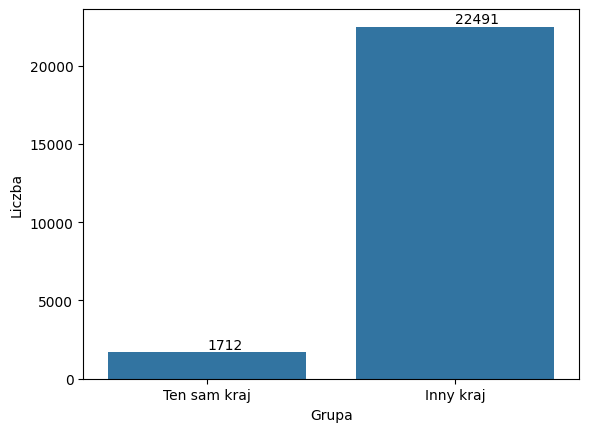

In [24]:
values = [same_judge_num, total_judge_skater_combinations]
labels = ['Ten sam kraj', 'Inny kraj']

_ = pd.DataFrame({'Grupa':labels, 'Liczba':values})

ax = sns.barplot(x='Grupa', y='Liczba', data=_)

for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 10,              
        f'{int(height)}',
        va='bottom'
    )

### Final DataFrame for bias checking

In [25]:
'''Now the structure of a dataframe will be changed, so that each judge from a row will be a new entry, 
to simplify the following calculations for bias and favourism'''

to_rows = [col for col in comp_df.columns if 'Judge No.' in col]

ids = list(range(1,10))

df_list = []
for num in ids:
    temp = comp_df.copy()
    
    temp['judge_id'] = f'Judge No.{num}'
    temp['judge_goe'] = temp.get(f'Judge No.{num}')
    temp['judge_nation'] = temp.get(f'Judge No.{num} nation')
    temp['is_same'] = temp.get(f'Judge No.{num} is_same')
    
    df_list.append(temp)

In [26]:
comp_df_m = pd.concat(df_list, ignore_index=True)
comp_df_m.drop(columns=to_rows, inplace=True)

comp_df_m['judge_name'] = comp_df_m.apply(
    lambda row: judge_map.get((row['competition'], row['judge_id']))[1],
    axis = 1
)

In [27]:
comp_df_m['goe_dist'] = comp_df_m.apply(
    lambda row: row['judge_goe'] - row['panel_median'],
    axis = 1
)

In [28]:
comp_df_m['higher'] = comp_df_m.apply(
    lambda row: 1 if row['judge_goe'] > row['panel_median'] else 0,
    axis = 1
)

In [29]:
comp_df_m['lower'] = comp_df_m.apply(
    lambda row: 1 if row['judge_goe'] < row['panel_median'] else 0,
    axis = 1
)

In [30]:
comp_df_m['pt_bias'] = comp_df_m.apply(
    lambda row: 1 if row['is_same'] * row['goe_dist'] > 0 else 0,
    axis = 1
)

In [31]:
comp_df_m = comp_df_m[['rank',
                   'competition', 
                   'name',
                   'nation', 
                   'startnr',
                   'total',
                   'tech',
                   'pcs',
                   'deductions',
                   'element',
                   'call',
                   'base_value',
                   'goe',
                   'final_element_score', 
                   'judge_id', 
                   'judge_name', 
                   'judge_nation',
                   'judge_goe',
                   'panel_median',
                   'is_same', 
                   'goe_dist', 
                   'higher', 
                   'lower', 
                   'pt_bias',
                   's_progression',
                   'prestige']]

In [32]:
comp_df_m

,rank,competition,name,nation,startnr,total,tech,pcs,deductions,element,...,judge_nation,judge_goe,panel_median,is_same,goe_dist,higher,lower,pt_bias,s_progression,prestige
0,1,ec2020SEG001OF,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,4S+2T,...,GEO,1.0,2.0,0,-1.0,0,1,0,0.54,0.06
1,1,ec2020SEG001OF,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,3F,...,GEO,2.0,3.0,0,-1.0,0,1,0,0.54,0.06
2,1,ec2020SEG001OF,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,FSSp4,...,GEO,3.0,3.0,0,0.0,0,0,0,0.54,0.06
3,1,ec2020SEG001OF,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,3A,...,GEO,3.0,3.0,0,0.0,0,0,0,0.54,0.06
4,1,ec2020SEG001OF,Michal BREZINA,CZE,26,89.77,48.05,41.72,0.0,StSq4,...,GEO,2.0,4.0,0,-2.0,0,1,0,0.54,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209614,24,wc2025SEG004OF,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,2A+2T,...,FRA,0.0,0.0,0,0.0,0,0,0,0.67,0.00
209615,24,wc2025SEG004OF,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,3Sq+2T,...,FRA,-5.0,-5.0,0,0.0,0,0,0,0.67,0.00
209616,24,wc2025SEG004OF,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,LSp2,...,FRA,-1.0,1.0,0,-2.0,0,1,0,0.67,0.00
209617,24,wc2025SEG004OF,Meda VARIAKOJYTE,LTU,1,88.83,48.22,40.61,0.0,StSq3,...,FRA,-2.0,0.0,0,-2.0,0,1,0,0.67,0.00


In [33]:
base_dir = os.path.dirname(os.getcwd()) 
file_path = os.path.join(base_dir, 'csv files', 'For_Stats.csv')

comp_df_m.to_csv(file_path, index=False)